In [1]:
import pandas as pd

pima_clean = pd.read_csv('diabetes_clean.csv')
pima_clean.head()

,log_pregnant,glucose,pressure,triceps,log_insulin,log_pedigree,log_age,mass,diabetes
0,1.945910,148.0,72.0,35.000000,5.579791,-0.466809,3.912023,33.6,pos
1,0.693147,85.0,66.0,29.000000,4.023256,-1.046969,3.433987,26.6,neg
2,2.197225,183.0,64.0,20.018286,5.501581,-0.397497,3.465736,23.3,pos
3,0.693147,89.0,66.0,23.000000,4.543295,-1.789761,3.044522,28.1,neg
4,0.000000,137.0,40.0,35.000000,5.123964,0.827678,3.496508,43.1,pos


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

# Define the target variable
target = pima_clean['diabetes']

# Define the predictor variables
predictors = pima_clean.drop('diabetes', axis=1)
# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the predictors
predictors_standard = scaler.fit_transform(predictors)

# Fit the GLM model
model = LogisticRegression()
model.fit(predictors_standard, target)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Perform cross-validation
cv_scores = cross_val_score(model, predictors_standard, target, cv=10)

print("Mean cross-validation score:", cv_scores.mean())

y_pred = cross_val_predict(model, predictors_standard, target, cv=10)
cm = confusion_matrix(target, y_pred)
cm

Coefficients: [[ 0.1724771   0.57608434 -0.10701523  0.20206995  0.07323743  0.21092117
   0.10589178  0.24127823]]
Intercept: [-0.73060879]
Mean cross-validation score: 0.7035714285714286


array([[433,  66],
       [161, 107]], dtype=int64)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create an instance of RandomForestClassifier
rf_model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_model, predictors_standard, target, cv=5)

# Print the mean cross-validation score
print("Mean cross-validation score:", cv_scores.mean())

Mean cross-validation score: 0.6791358967829556


In [11]:
import pandas as pd

# Create a new DataFrame with predictors_standard and target as columns
new_df = pd.concat([pd.DataFrame(predictors_standard, columns=pima_clean.columns[:-1]), target], axis=1)

# Assign the new DataFrame to pima_clean
new_df

,log_pregnant,glucose,pressure,triceps,log_insulin,log_pedigree,log_age,mass,diabetes
0,0.824925,0.869384,-0.030936,0.666288,1.301444,0.766372,1.442350,0.170549,pos
1,-0.802480,-1.202908,-0.521349,0.023531,-1.288434,-0.134283,-0.043294,-0.845043,neg
2,1.151396,2.020657,-0.684820,-0.938646,1.171313,0.873973,0.055375,-1.323822,pos
3,-0.802480,-1.071334,-0.521349,-0.619226,-0.423155,-1.287411,-1.253676,-0.627416,neg
4,-1.702915,0.507555,-2.646469,0.666288,0.543006,2.775963,0.151008,1.548854,pos
...,...,...,...,...,...,...,...,...,...
762,1.412078,-0.676611,0.296005,2.058928,0.657801,-1.250666,2.160602,0.068990,neg
763,-0.275760,0.014152,-0.194407,-0.190722,0.247169,-0.183713,-0.472639,0.634820,neg
764,0.624675,-0.018741,-0.030936,-0.619226,-0.131637,-0.692423,-0.145198,-0.903077,neg
765,-0.802480,0.145726,-1.011761,-0.293427,0.125676,-0.143154,1.250053,-0.337247,neg


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of trees
    'max_features': [0.25, 0.5, 1]  # mtry
}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(predictors_standard, target)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)


Best parameters: {'max_features': 1, 'n_estimators': 300}
Best score: 0.7000169764875647


In [7]:
# Create an instance of RandomForestClassifier
rf_model = RandomForestClassifier(max_features=1, n_estimators=300, random_state=123)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, predictors_standard, target, cv=5)

# Print the mean cross-validation score
print("Mean cross-validation score:", cv_scores.mean())

Mean cross-validation score: 0.6921908157202274


In [31]:
x = new_df.drop('diabetes', axis=1)
y = new_df['diabetes']

In [33]:
x

,log_pregnant,glucose,pressure,triceps,log_insulin,log_pedigree,log_age,mass
0,0.824925,0.869384,-0.030936,0.666288,1.301444,0.766372,1.442350,0.170549
1,-0.802480,-1.202908,-0.521349,0.023531,-1.288434,-0.134283,-0.043294,-0.845043
2,1.151396,2.020657,-0.684820,-0.938646,1.171313,0.873973,0.055375,-1.323822
3,-0.802480,-1.071334,-0.521349,-0.619226,-0.423155,-1.287411,-1.253676,-0.627416
4,-1.702915,0.507555,-2.646469,0.666288,0.543006,2.775963,0.151008,1.548854
...,...,...,...,...,...,...,...,...
762,1.412078,-0.676611,0.296005,2.058928,0.657801,-1.250666,2.160602,0.068990
763,-0.275760,0.014152,-0.194407,-0.190722,0.247169,-0.183713,-0.472639,0.634820
764,0.624675,-0.018741,-0.030936,-0.619226,-0.131637,-0.692423,-0.145198,-0.903077
765,-0.802480,0.145726,-1.011761,-0.293427,0.125676,-0.143154,1.250053,-0.337247


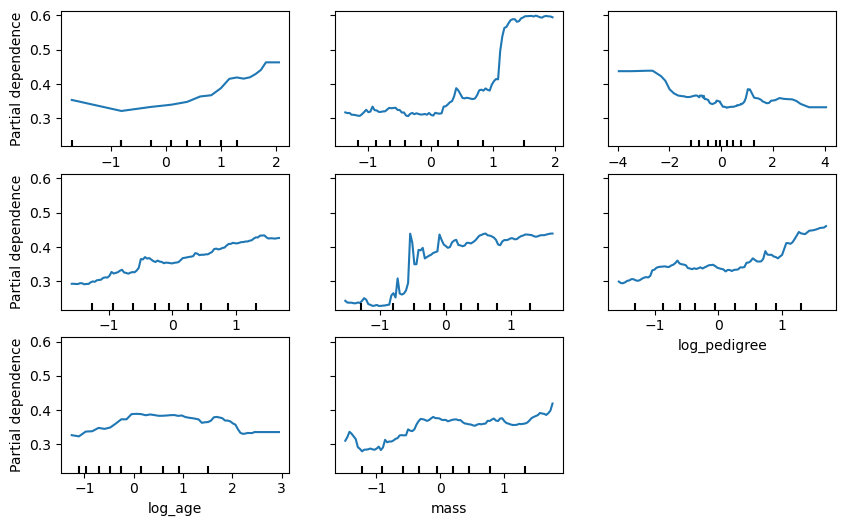

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Fit a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=300, max_features=8, random_state=42)
rf_model.fit(x, y)

# Create an instance of PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_model, features = (0,1,2,3,4,5,6,7), X=x, ax=ax)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Fit a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=300, max_features=8, random_state=42)





In [71]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
interaction_features = poly.fit_transform(x)

# Convert interaction features to DataFrame
interaction_df = pd.DataFrame(interaction_features)

print(interaction_df.head())

# fit a random forest model
rf_model = RandomForestClassifier(n_estimators=300, max_features=16, random_state=42)
rf_model.fit(interaction_df, y)

# assess using cross-validation
cv_scores = cross_val_score(rf_model, interaction_df, y, cv=5)
print("Mean cross-validation score:", cv_scores.mean())


         0         1         2         3         4         5         6   \
0  0.824925  0.869384 -0.030936  0.666288  1.301444  0.766372  1.442350   
1 -0.802480 -1.202908 -0.521349  0.023531 -1.288434 -0.134283 -0.043294   
2  1.151396  2.020657 -0.684820 -0.938646  1.171313  0.873973  0.055375   
3 -0.802480 -1.071334 -0.521349 -0.619226 -0.423155 -1.287411 -1.253676   
4 -1.702915  0.507555 -2.646469  0.666288  0.543006  2.775963  0.151008   

         7         8         9   ...        26        27        28        29  \
0  0.170549  0.717177 -0.025520  ...  0.867136  0.510624  0.961021  0.113635   
1 -0.845043  0.965310  0.418372  ... -0.030318 -0.003160 -0.001019 -0.019885   
2 -1.323822  2.326576 -0.788499  ... -1.099448 -0.820351 -0.051978  1.242600   
3 -0.627416  0.859724  0.418372  ...  0.262028  0.797199  0.776309  0.388512   
4  1.548854 -0.864323  4.506713  ...  0.361798  1.849591  0.100614  1.031982   

         30        31        32        33        34        35  
0  0

,log_pregnant,glucose,pressure,triceps,log_insulin,log_pedigree,log_age,mass
0,0.824925,0.869384,-0.030936,0.666288,1.301444,0.766372,1.442350,0.170549
1,-0.802480,-1.202908,-0.521349,0.023531,-1.288434,-0.134283,-0.043294,-0.845043
2,1.151396,2.020657,-0.684820,-0.938646,1.171313,0.873973,0.055375,-1.323822
3,-0.802480,-1.071334,-0.521349,-0.619226,-0.423155,-1.287411,-1.253676,-0.627416
4,-1.702915,0.507555,-2.646469,0.666288,0.543006,2.775963,0.151008,1.548854
...,...,...,...,...,...,...,...,...
762,1.412078,-0.676611,0.296005,2.058928,0.657801,-1.250666,2.160602,0.068990
763,-0.275760,0.014152,-0.194407,-0.190722,0.247169,-0.183713,-0.472639,0.634820
764,0.624675,-0.018741,-0.030936,-0.619226,-0.131637,-0.692423,-0.145198,-0.903077
765,-0.802480,0.145726,-1.011761,-0.293427,0.125676,-0.143154,1.250053,-0.337247


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Create the GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(x, y)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, x, y, cv=5)

# Print the best parameters and the mean cross-validation score
print("Best parameters:", best_params)
print("Mean cross-validation score:", cv_scores.mean())

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Mean cross-validation score: 0.7013581190051779


In [41]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.05, 0.01, 0.005],
    'n_estimators': [300, 500],
    'max_depth': [2, 3, 4]
}

# Create the GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(x, y)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, x, y, cv=5)

# Print the best parameters and the mean cross-validation score
print("Best parameters:", best_params)
print("Mean cross-validation score:", cv_scores.mean())

Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Mean cross-validation score: 0.7026483320600968


In [45]:
import numpy as np

# Assuming y is a numpy array or a list
y = np.array(y)  # Convert to numpy array if it's a list
y_binary = np.where(y == 'pos', 1, 0)
y_binary

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Split the data into train and test sets

#X_train, X_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.2, random_state=42)

# Now you can use X_train and y_train for training your model, and X_test and y_test for evaluating its performance

n_nodes = [8, 16, 32]

for n in n_nodes:
    model = Sequential([
        Dense(units=n, activation='relu', input_shape=(x.shape[1],)),
        Dense(units=n, activation='relu'),
        Dense(units=n, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ])

# Compile the model
    model.compile(optimizer=Adam(learning_rate = 0.1),
                loss='binary_crossentropy',
                metrics=['accuracy'])

    history = model.fit(x, y_binary, epochs=30, batch_size=16, verbose=0, validation_split=0.2)
    final_val_acc = history.history['val_accuracy'][-1]
    print("Final validation accuracy: %s" % final_val_acc)

Final validation accuracy: 0.6428571343421936
